In [ ]:
"""
From sklearn.datasets load digits dataset and do following

1. Classify digits (0 to 9) using KNN classifier. You can use different values for k neighbors and need to figure out a value of K 
that gives you a maximum score. You can manually try different values of K or use gridsearchcv
2. Plot confusion matrix
3. Plot classification report
"""

In [ ]:
#Load digits, use gridsearchcv to tune the parameters

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [4]:
digits = load_digits()

In [5]:
# Load into a df
df = pd.DataFrame(digits.data, columns=digits.feature_names)

df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [11]:
X = digits.data
y = digits.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [6]:
model_params = {
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3,6,9,12]
        }
    }
}

In [13]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_param': clf.best_params_,
        'best_score': clf.best_score_
    })

In [14]:
scores

[{'model': 'knn',
  'best_param': {'n_neighbors': 3},
  'best_score': 0.9846883468834691}]

In [15]:
df_scores = pd.DataFrame(scores, columns=['model', 'best_param', 'best_score'])
df_scores

,model,best_param,best_score
0,knn,{'n_neighbors': 3},0.984688


In [16]:
y_pred = clf.predict(X_test)

In [18]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm)

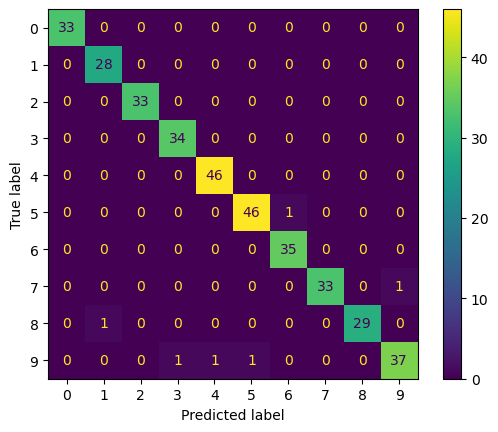

In [19]:
disp.plot()

In [20]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      0.97      0.98        29
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        35
           4       1.00      0.98      0.99        47
           5       0.98      0.98      0.98        47
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        33
           8       0.97      1.00      0.98        29
           9       0.93      0.97      0.95        38

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

